In [1]:
import sys
sys.path.append('..')

In [2]:
import string
from pathlib import Path
from random import seed, randint, choices, choice

import numpy as np
from PIL import Image, ImageDraw, ImageFilter, ImageFont, ImageOps
from tqdm import tqdm

from allometry.const import DATA_DIR, FONTS, IMAGE_SIZE

In [3]:
CHARS = """0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ$%*()-+=<>?,./;:"""
len(CHARS)

52

In [4]:
def custom_filter(image):
    """Degrade image in realistic way."""
    image = image.filter(ImageFilter.Kernel(
        size=(3, 3), kernel=(1, 0, 1, 0, 0, 0, 1, 0, 1)))
    return image

In [5]:
def filter_image(image, image_filter):
    """Use filters to extend the effect of the added snow."""
    if image_filter == 'max':
        image = image.filter(ImageFilter.MaxFilter())
    elif image_filter == 'min':
        image = image.filter(ImageFilter.MinFilter())
    elif image_filter == 'median':
        image = image.filter(ImageFilter.MedianFilter())
    elif image_filter == 'custom-max':
        image = custom_filter(image)
        image = image.filter(ImageFilter.MaxFilter())
    elif image_filter == 'custom-min':
        image = custom_filter(image)
        image = image.filter(ImageFilter.MinFilter())
    elif image_filter == 'custom-median':
        image = custom_filter(image)
        image = image.filter(ImageFilter.MedianFilter())

    return image

In [6]:
def add_soot(image, fract=0.1):
    data = np.array(image).copy()

    shape = data.shape
    data = data.flatten()
    how_many = int(data.size * fract)
    mask = np.random.choice(data.size, how_many)
    data[mask] = 0
    data = data.reshape(shape)

    image = Image.fromarray(data)
    return image

1979_dot_matrix


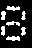

B612Mono-Bold


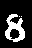

B612Mono-Regular


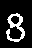

CourierPrime-Bold


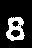

CourierPrime-Regular


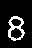

DOTMATRI


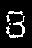

RobotoMono-VariableFont_wght


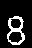

DottyRegular-vZOy


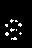

EHSMB


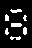

ELEKTRA_


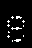

hydrogen


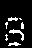

Merchant Copy Doublesize


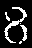

Merchant Copy


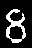

Ordre de Départ


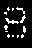

scoreboard


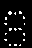

In [7]:
FONT_PARAMS = {
    '1979_dot_matrix': {},
    'B612Mono-Bold': {'filter': 'custom-median'},
    'B612Mono-Regular': {},
    'CourierPrime-Bold': {'pt': 48, 'filter': 'custom-median'},
    'CourierPrime-Regular': {'pt': 48},
    'DOTMATRI': {},
    'DottyRegular-vZOy': {'pt': 72},
    'EHSMB': {},
    'ELEKTRA_': {'pt': 48},
    'Merchant Copy Doublesize': {'filter': 'custom-median'},
    'Merchant Copy': {'pt': 72},
    'OCRB_Medium': {'filter': 'custom-median'},
    'OCRB_Regular': {'filter': 'custom-median'},
    'Ordre de Départ': {},
    'RobotoMono-VariableFont_wght': {},
    'hydrogen': {'pt': 52},
    'scoreboard': {'pt': 52},
}


TINY_PUNCT = '.-,'
OTHER_PUNCT = """$%*()<=>?+/;:^"""
CHARS = list(string.digits + string.ascii_uppercase + TINY_PUNCT + OTHER_PUNCT)

WEIGHTS = [10] * len(string.digits)
WEIGHTS += [5] * len(string.ascii_uppercase)
WEIGHTS += [10] * len(TINY_PUNCT)
WEIGHTS += [1] * len(OTHER_PUNCT)

char = '8'

for font_path in FONTS:
    print(font_path.stem)

    params = FONT_PARAMS.get(font_path.stem, {})

    size_high = params.get('pt', int(IMAGE_SIZE[0] * 1.33333))
    size_low = size_high - 4
    
    font_size = randint(size_low, size_high)

    font = ImageFont.truetype(str(font_path), size=font_size)
    size = font.getsize_multiline(char)

    image = Image.new('L', IMAGE_SIZE, color='black')

    left = (IMAGE_SIZE[0] - size[0]) // 2
    left = left if left > 0 else 0
    
    top = (IMAGE_SIZE[1] - size[1]) // 2
    top = top if top > 0 else 0

    draw = ImageDraw.Draw(image)
    draw.text((left, top), char, font=font, fill='white')

    image = add_soot(image, 0.2)

    filter_ = params.get('filter', 'median')
    image = filter_image(image, filter_)

    image = image.point(lambda x: 255 if x > 128 else 0)

    display(image)